In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
import warnings

# Detai of data set
pregnancies: The number of time the patient had become pregnent

glucose : plasma glucose concentration

Bp:Diastolic blood prssure

Skinthickness:Triceps skn fold thickness

Insulinn:2 hour serum insulin

BMI; Body mass index

DiabetesPedigreeFunction

Age:Age of the patient

Outcome: Whetrer the patient have diabetes or not

In [3]:

d=pd.read_csv('C:\\Users\\Admin\\Desktop\\important\\Skill Circle\\dataset\\diabetes.csv')

In [4]:
d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
d=d.rename(columns={'Pregnancies':'preg','Glucose':'glu','BloodPressure':'bp','SkinThickness':'st','Insulin':'In','BMI':'bmi','Age':'age','DiabetesPedigreeFunction':'dpf','Outcome':'class'})

In [6]:
d.head()

,preg,glu,bp,st,In,bmi,dpf,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
d=pd.DataFrame(d)

In [8]:
d.head()

,preg,glu,bp,st,In,bmi,dpf,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


 # Correlation Matrix
 It states that how the variable are related to each other
 
 Corelation can be positive (increase in one value of feature will be increase the value of the target)orr negative( increase in value of feature wil decrease in target varible)
 
 heatmap identify which  feature is most reealted to the target varible

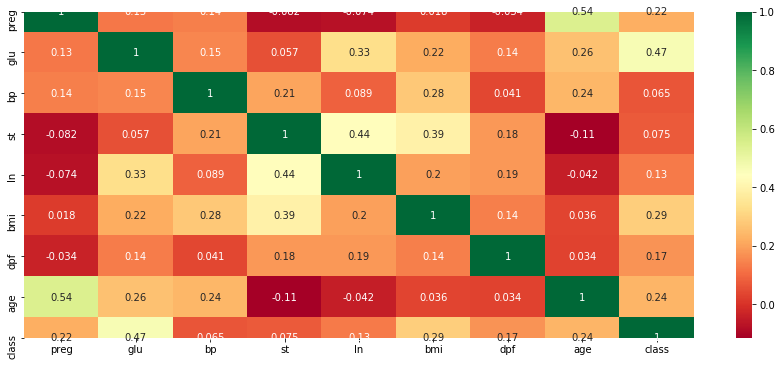

In [9]:
corr_mat=d.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr_mat,annot=True,cmap='RdYlGn')

# top 6 are highly correlated and if these six will increase the person will be diabetes
# age and preg are highly correlated 
# in general its not advisable to not be influenced by one bias or intuition

In [10]:
# Splitting daata into input nd target variable
X=d.drop(['class'],axis=1)# input variable
y=d['class'] #target varible diabets or not

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=1)

# the basic steps we follow
. Train a baseline classifier( logistic and random forest)

.Identify the most important feture selection

.Create an new limited feature adatset only containing those feature

.Train a second classifier on new dataset

.Calculate the acuurcy of full feature and accuracy limited

# now lets implement various feature selection technique

# recursive feature elimination
Recursive= Something that happens repeatedly

As the name suggest,Recursive Feature elemination works by reapeatedly 
removing feature and building the feature on remaining data.



# Train a logistic regression model (Base_Line Model

In [12]:
# Building the logistic regression model
from sklearn.linear_model import LogisticRegression
clf_lr=LogisticRegression(random_state=1)
lr_baseline_model=clf_lr.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
#Noting down the accuracy of baseline_model
from sklearn.metrics import accuracy_score,f1_score

# finding out our predicted values
y_pred=lr_baseline_model.predict(X_test)

In [14]:
# Calculating the accuracy and f1 score by comparing the actual and predicted value
ac=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print("Baseline Model Accuracy:" ,ac)
print('Baseline model f1_score:',f1)

Baseline Model Accuracy: 0.7755905511811023
Baseline model f1_score: 0.632258064516129


In [15]:
from sklearn.feature_selection import RFE
rfe=RFE(estimator=clf_lr,step=1)
#estimator+clf_lr is a class baseline model which we have classified under baseline model selection
#step=1 remove one deature at one time and the builds a model on the remaining feature
#It use model accuracy identify which feature and combination of feature contribute the most predicting the target variable
# Fit the function for ranking the feature
fit=rfe.fit(X_train,y_train)

print("Num feature: %d" % fit.n_features_)
print("Selected feature: %s" % fit.support_)
print("Feature ranking: %s" % fit.ranking_)

Num feature: 4
Selected feature: [ True  True False False False  True  True False]
Feature ranking: [1 1 2 4 5 1 1 3]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

# Representing feature rnks in the form of the table
From the above we can't understand which feature has a better rank so to understand this we get this.

In [16]:
selected_rfe_features=pd.DataFrame({'Feature':list( X_train.columns),
                                   'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,preg,1
1,glu,1
5,bmi,1
6,dpf,1
2,bp,2
7,age,3
3,st,4
4,In,5


# Creating a new subset of data from with only selected features
#Now we have obtained which feature have a best score which feature should be selected for model
#To select important feature you need to apply transformation on dataset we use .transform() to tansform our dataset
#Always remember train and test data should must b transformed seperately else there might be data leak

In [17]:
# Transforming the data
X_train_rfe=rfe.transform(X_train)
X_test_rfe=rfe.transform(X_test)

lr_rfe_model=clf_lr.fit(X_train_rfe,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Comparision of model selection with or without feture selection

In [18]:
# Making prediction and evaluating the model
y_pred_rfe=lr_rfe_model.predict(X_test_rfe)
rfe_ac=accuracy_score(y_test,y_pred_rfe)
rfe_f1_score=f1_score(y_test,y_pred_rfe)
print("RFE accuracy rate: ", rfe_ac)
print("F1 accuracy rate: ",rfe_f1_score)

''' we can see an improvement in both accuracy and f1 score as opposes to base line model where we did't apply feature selection'''

RFE accuracy rate:  0.7834645669291339
F1 accuracy rate:  0.6357615894039735


" we can see an improvement in both accuracy and f1 score as opposes to base line model where we did't apply feature selection"

# Train a random Forest Classifier

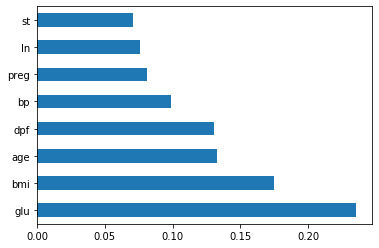

In [19]:
from sklearn.ensemble import  RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=10000,random_state=1,n_jobs=-1)
#n_estimators  is the nmber of tree in the forest
#n_jobs=-1   use alll processors for trining


#Train the classifier
rf_clf.fit(X_train,y_train)

#Plot graph for feature importance for the better visualization
feat_importance = pd.Series(rf_clf.feature_importances_,index=X_train.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

#
Feature importance is the another technique of feature selection used to select feature. I gives you a score for each feature of your data, The higher the scre the more imporatant the feature towards your output variable .
Bagged decision tree model like Random Forest Classifier  can be used to estimate the  imporatance feature.

In [20]:
#These four glucose , bmi, age and dpf have more imporatnce upto 67%. The individual sccore is more than the 0.13 which is greater than the average of all the labels

# Identify and select themost improatanr feature of the modle selection

In [21]:
from sklearn.feature_selection import SelectFromModel
# Create a select object that will use the random forst classifier to identify
#It will select the feature on the imporatance of score
rf_sfm=SelectFromModel(rf_clf)


#Alternativey if you wnt to select the threshold you can seslect the feature you may the following code that is commented
#Fetur that have an importance of more than(0.13) all the top 4 feature above.

#rf_sfm=SelectFroModel(rf_clf,threshold=0.13)
#train the selector
rf_sfm=rf_sfm.fit(X_train,y_train)

# Create a new subset of data from the selected feature only
To select the important feature you need to apply the tranformation.We will use .transform() function to select the important feature of the data, Always remeberthst trin snd test data must be transformed  

In [22]:
#Transform a data inti new dataset with its important feature seletion
X_train_transform= rf_sfm.transform(X_train)
X_test_transform=rf_sfm.transform(X_test)

# Train a selected new  Random Forest Claassifier using selected important feature


In [23]:
#Create a new  random forest for selected important feature
clf_important= RandomForestClassifier(n_estimators=10000, random_state=1,n_jobs=-1)

In [24]:
clf_important=clf_important.fit(X_train_transform,y_train)

# Comparision of model without feature selection

In [25]:
y_pred=rf_clf.predict(X_test)
rf_ac=accuracy_score(y_test,y_pred)
rf_score=f1_score(y_test,y_pred)

print("Baseline Mode Accuracy:", rf_ac)
print("Baseline model F1 score", rf_score)

Baseline Mode Accuracy: 0.7913385826771654
Baseline model F1 score 0.6666666666666666


In [26]:
y_important_pred=clf_important.predict(X_test_transform)
rf_ac=accuracy_score(y_test,y_important_pred)
rf_score=f1_score(y_test,y_important_pred)

In [27]:
print(rf_ac)
print(rf_score)

0.7716535433070866
0.6506024096385542


# Boruta

# Boruta is an all relevant feaure selection method  whle most of the algorithm are minimal option.This means it tries to find out the all feature carrying information usuable for predictions rther than finding the possiby compat subset of the feature on which we have minimal error